In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-08-30 22:10:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-08-30 22:10:20 (104 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [4]:
model = Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(140, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(70)))
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words,activation='softmax'))
# Pick an optimizer
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 280)           269920    
_________________________________________________________________
dropout (Dropout)            (None, 10, 280)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 140)               196560    
_________________________________________________________________
dense (Dense)                (None, 4096)              577536    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              13155467  
Total params: 14,520,583
Trainable params: 14,520,583
Non-trainable params: 0
____________________________________________

In [5]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 7s 14ms/step - loss: 6.8969 - accuracy: 0.0194
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.5142 - accuracy: 0.0221
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.3920 - accuracy: 0.0277
Epoch 4/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2640 - accuracy: 0.0347
Epoch 5/100
484/484 [==============================] - 7s 14ms/step - loss: 6.1562 - accuracy: 0.0379
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 6.0462 - accuracy: 0.0415
Epoch 7/100
484/484 [==============================] - 7s 14ms/step - loss: 5.9304 - accuracy: 0.0464
Epoch 8/100
484/484 [==============================] - 7s 14ms/step - loss: 5.8155 - accuracy: 0.0517
Epoch 9/100
484/484 [==============================] - 7s 14ms/step - loss: 5.6981 - accuracy: 0.0578
Epoch 10/100
484/484 [==============================] - 7s 14ms/step - loss: 5.589

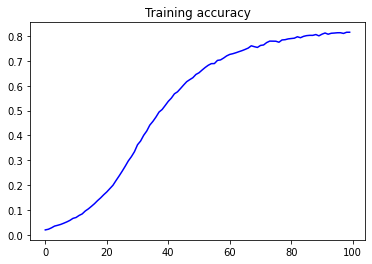

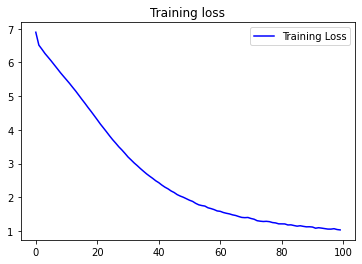

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [7]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope faults and was the loss of thee excuse thee so nothing nothing mock you now find her you so privilege thee mine eye be 'will ' weep of ' are so taste did lose swear new of lie in wanting hate of grow cheeks brow free end ' go cold perpetual beard did feel seen they seen excuse go store so cause with hate doth lie so men in every sight are youth still lies tend die must ' go right both hate back again graced be seen hate graced are store so prove lie must in grow cheeks brow
